In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data = pd.read_csv("./train.csv")

pd.set_option('display.max_columns', None)  # 모든 열을 출력하도록 설정
pd.set_option('display.expand_frame_repr', False)  # 너비 제한 없이 출력
print(data.head(30))

                ID           사고일시   요일 기상상태            시군구             도로형태 노면상태  사고유형 사고유형 - 세부분류       법규위반 가해운전자 차종 가해운전자 성별 가해운전자 연령 가해운전자 상해정도     피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도  사망자수  중상자수  경상자수  부상자수  ECLO
0   ACCIDENT_00000  2019-01-01 00  화요일   맑음   대구광역시 중구 대신동         단일로 - 기타   건조  차대사람  길가장자리구역통행중    안전운전불이행       승용        여      51세       상해없음          보행자        여      70세         중상     0     1     0     0     5
1   ACCIDENT_00001  2019-01-01 00  화요일   흐림  대구광역시 달서구 감삼동         단일로 - 기타   건조  차대사람       보도통행중         기타       승용        남      39세       상해없음          보행자        남      61세         경상     0     0     1     0     3
2   ACCIDENT_00002  2019-01-01 01  화요일   맑음  대구광역시 수성구 두산동         단일로 - 기타   건조  차대사람       차도통행중    안전운전불이행       승용        남      70세       상해없음          보행자        남      38세         경상     0     0     1     0     3
3   ACCIDENT_00003  2019-01-01 02  화요일   맑음   대구광역시 북구 복현동         단일로 - 기타   건조   차대차          추돌    안전운전불이행       승용  

In [3]:
data.shape

(39609, 23)

In [4]:
columns = data.columns

In [5]:
columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [6]:
categorical_columns = columns[: -5]
print(categorical_columns)

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도'],
      dtype='object')


In [7]:
len(categorical_columns)

18

#test도 함께 전처리 진행하기

In [8]:
test = pd.read_csv("./test.csv")

In [9]:
# '시군구' 열에서 특정 텍스트 패턴을 제거하여 구 이름만 남김
gu_names = ['중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군', '군위군']
for gu in gu_names:
    data['시군구'] = data['시군구'].str.replace(f'대구광역시 {gu}', gu)
    test['시군구'] = test['시군구'].str.replace(f'대구광역시 {gu}', gu)

data['시군구'] = data['시군구'].str.extract('(중구|동구|서구|남구|북구|수성구|달서구|달성군|군위군)')
test['시군구'] = test['시군구'].str.extract('(중구|동구|서구|남구|북구|수성구|달서구|달성군|군위군)')


In [10]:
categorical_columns_1 = categorical_columns[2: 5] #
categorical_columns_2 = categorical_columns[5: 10]
categorical_columns_3 = categorical_columns[10: 15]
categorical_columns_4 = categorical_columns[15: 18]

In [11]:
#기초 통계 describe로 확인
basic_stats = data.describe()

#상관관계 분석
correlation_matrix = data.corr()

#결과
print(basic_stats)
print(correlation_matrix['ECLO'])

               사망자수          중상자수          경상자수          부상자수          ECLO
count  39609.000000  39609.000000  39609.000000  39609.000000  39609.000000
mean       0.007776      0.262365      1.070085      0.126865      4.726704
std        0.090109      0.500845      0.992034      0.394670      3.207206
min        0.000000      0.000000      0.000000      0.000000      1.000000
25%        0.000000      0.000000      0.000000      0.000000      3.000000
50%        0.000000      0.000000      1.000000      0.000000      3.000000
75%        0.000000      0.000000      1.000000      0.000000      6.000000
max        2.000000      6.000000     22.000000     10.000000     74.000000
사망자수    0.218507
중상자수    0.464520
경상자수    0.636370
부상자수   -0.118713
ECLO    1.000000
Name: ECLO, dtype: float64


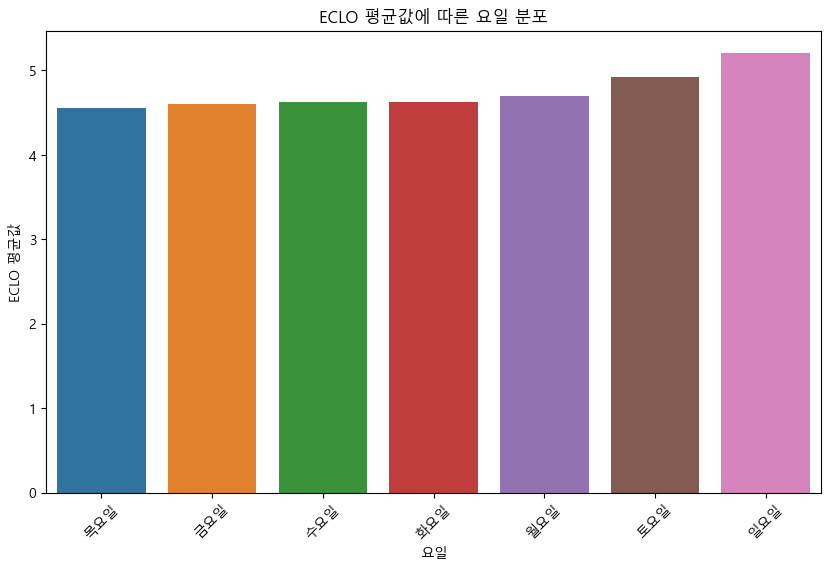

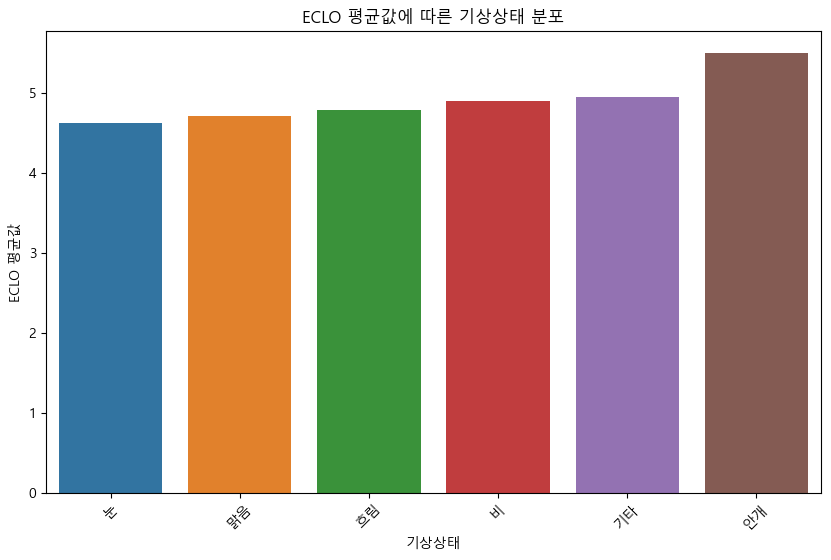

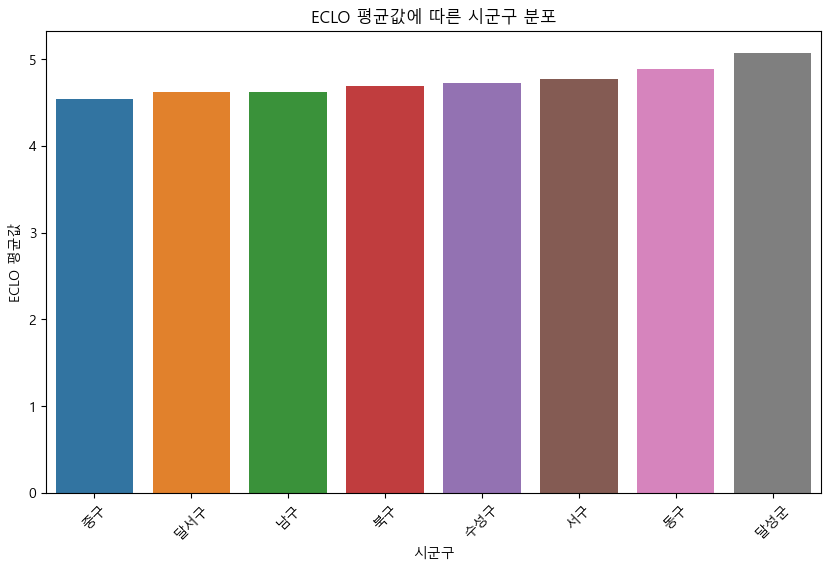

In [12]:
#각 범주형 변수에 대해 ECLO의 평균값 계산 및 시각화
for column in categorical_columns_1:
    plt.figure(figsize = (10,6))
    data_grouped = data.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

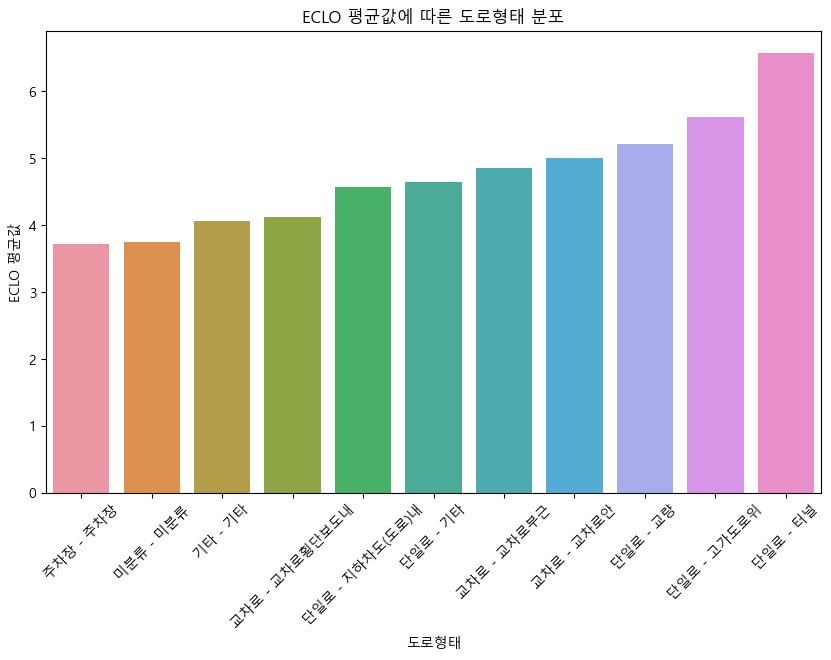

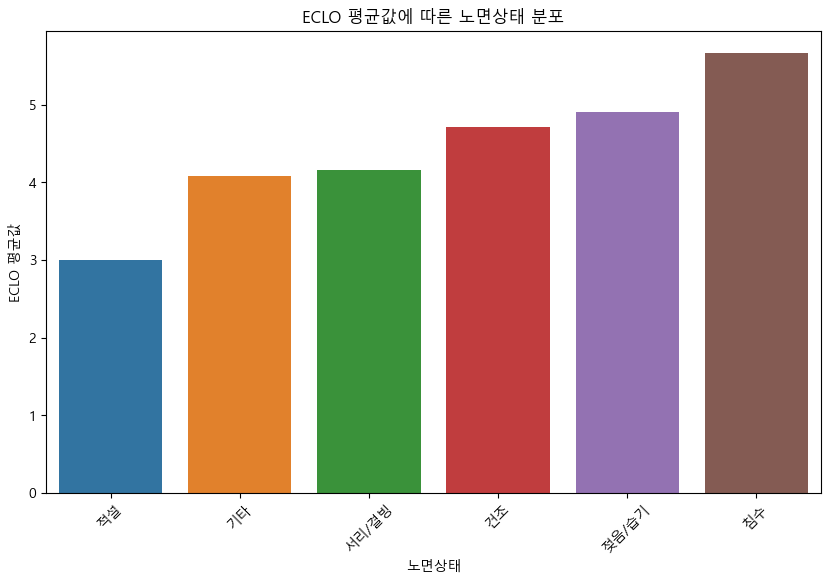

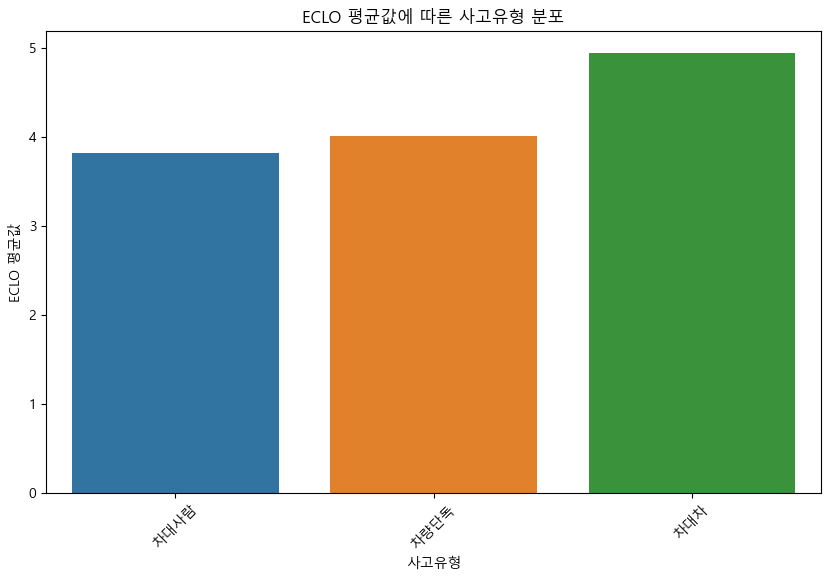

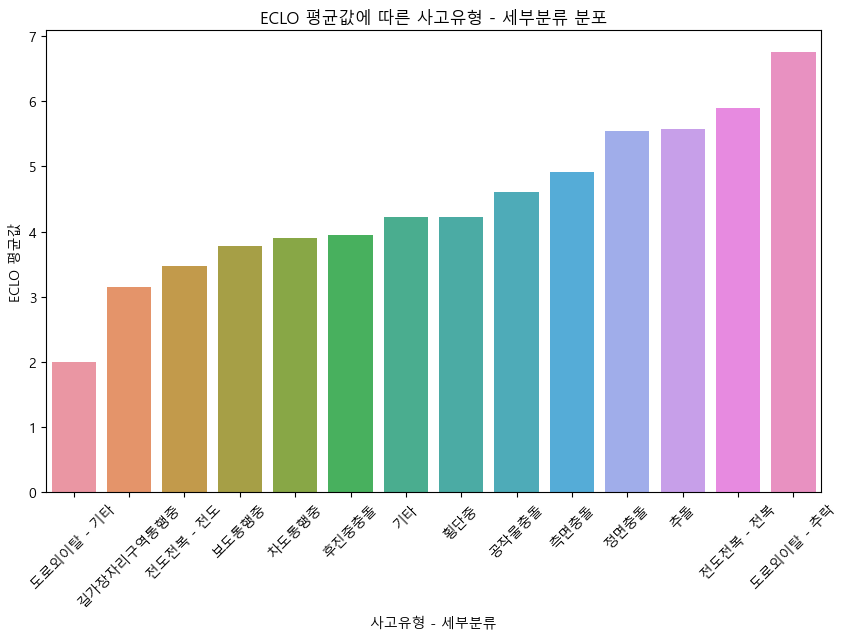

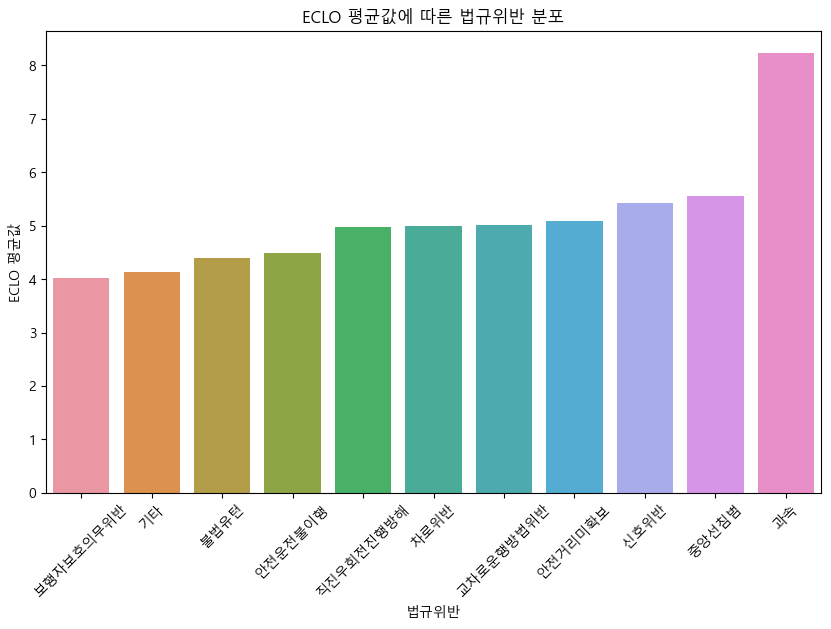

In [13]:
#각 범주형 변수에 대해 ECLO의 평균값 계산 및 시각화
for column in categorical_columns_2:
    plt.figure(figsize = (10,6))
    data_grouped = data.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

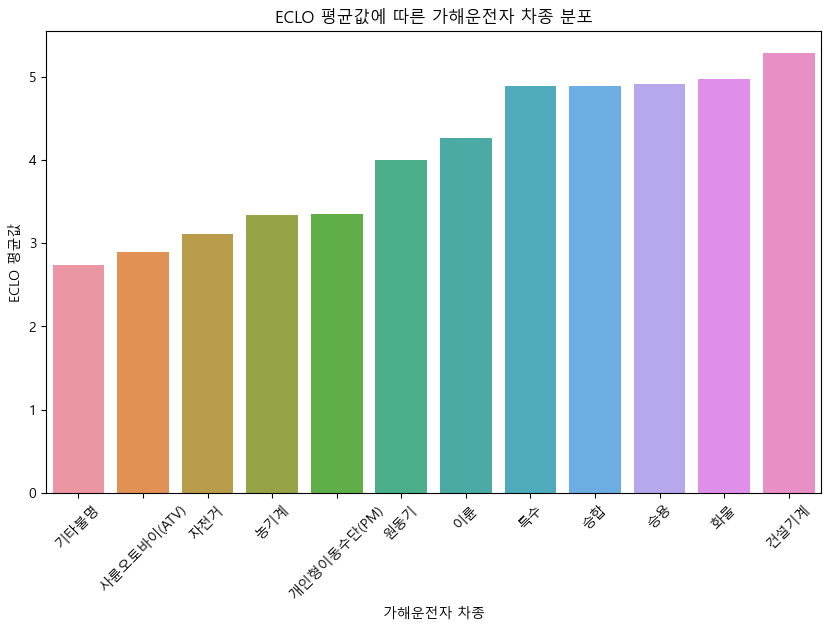

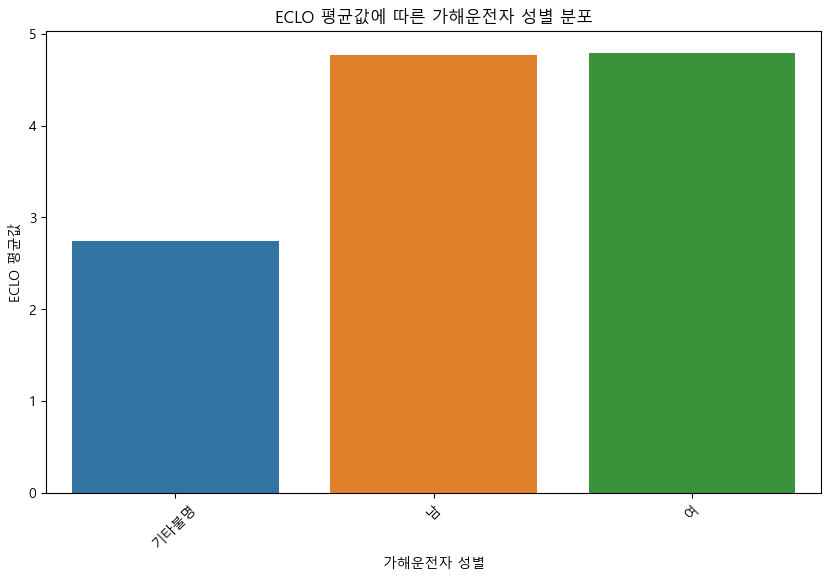

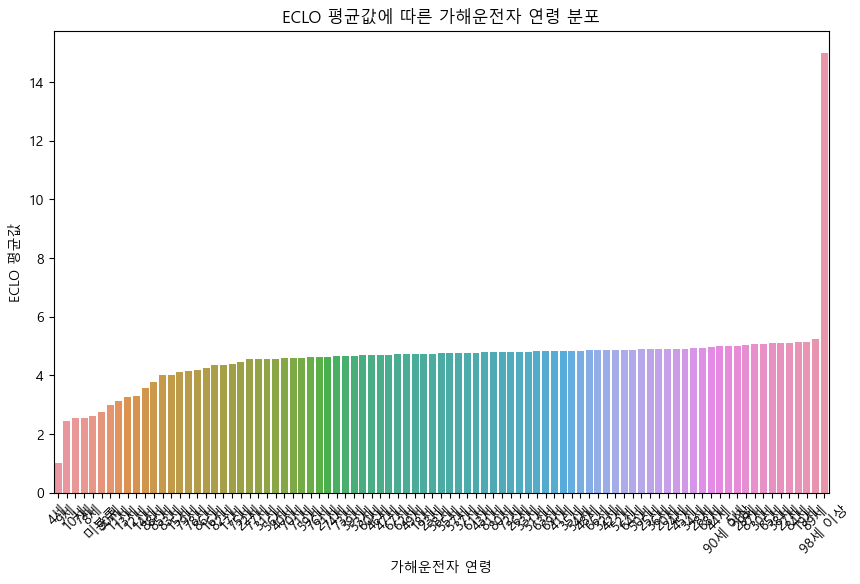

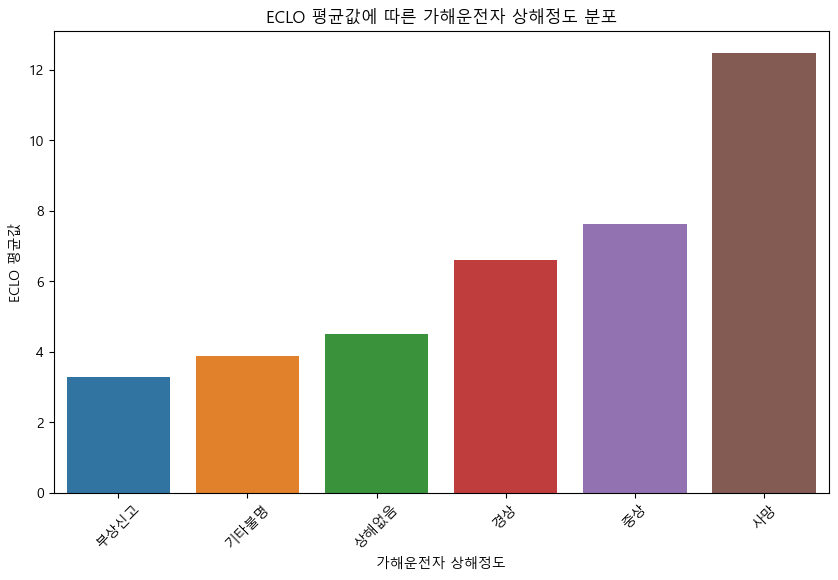

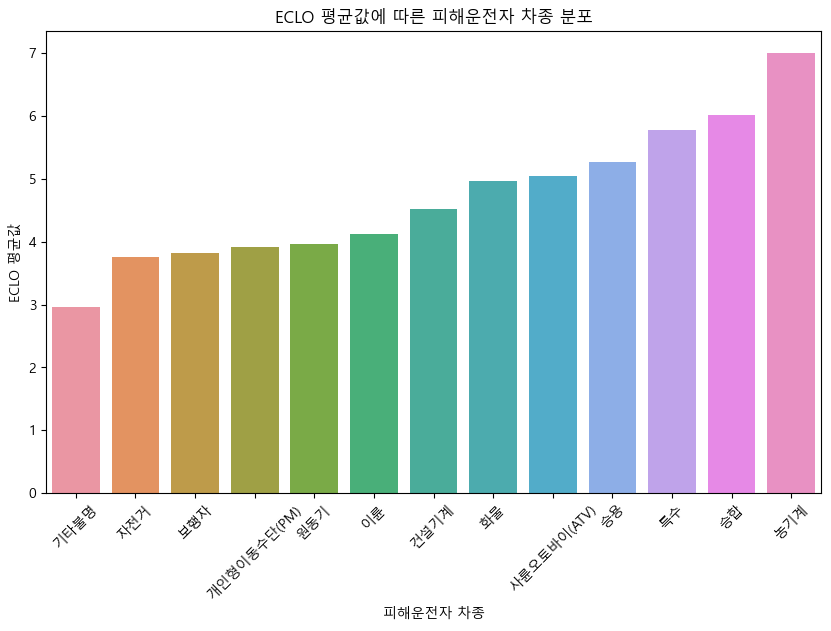

In [14]:
#각 범주형 변수에 대해 ECLO의 평균값 계산 및 시각화
for column in categorical_columns_3:
    plt.figure(figsize = (10,6))
    data_grouped = data.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

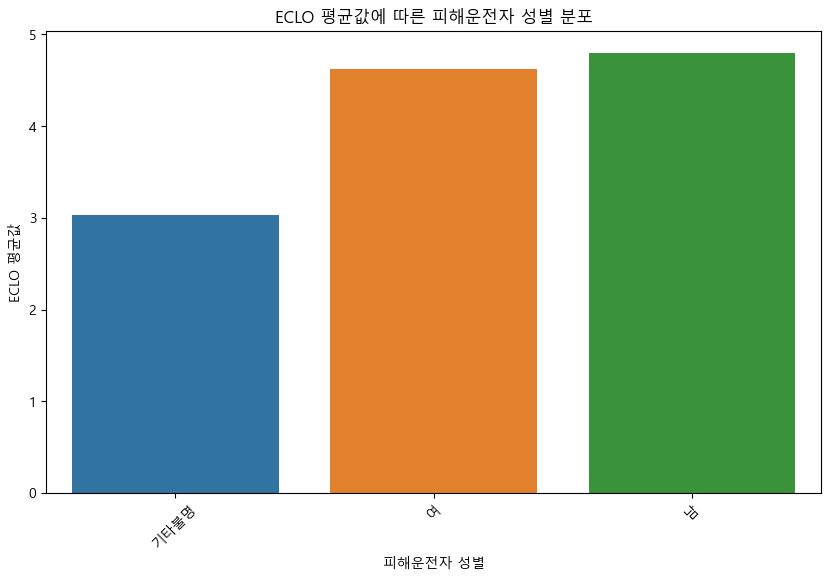

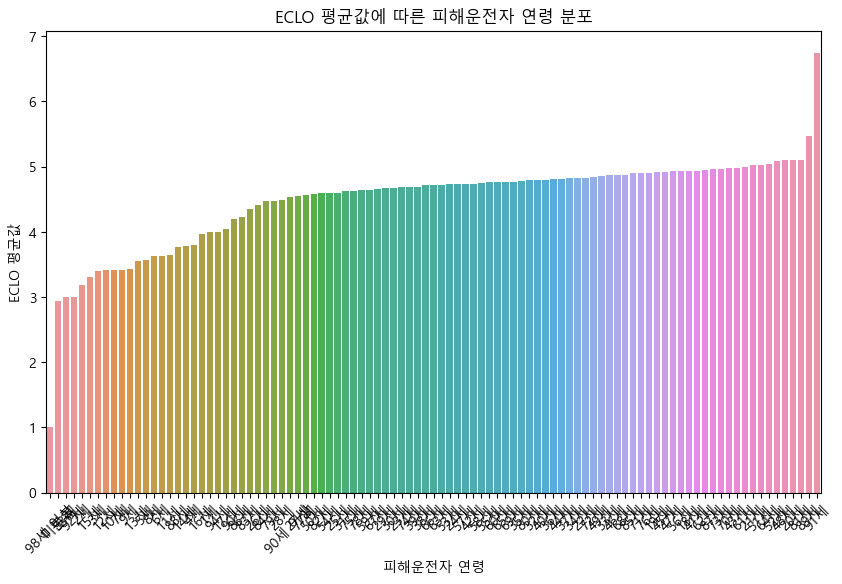

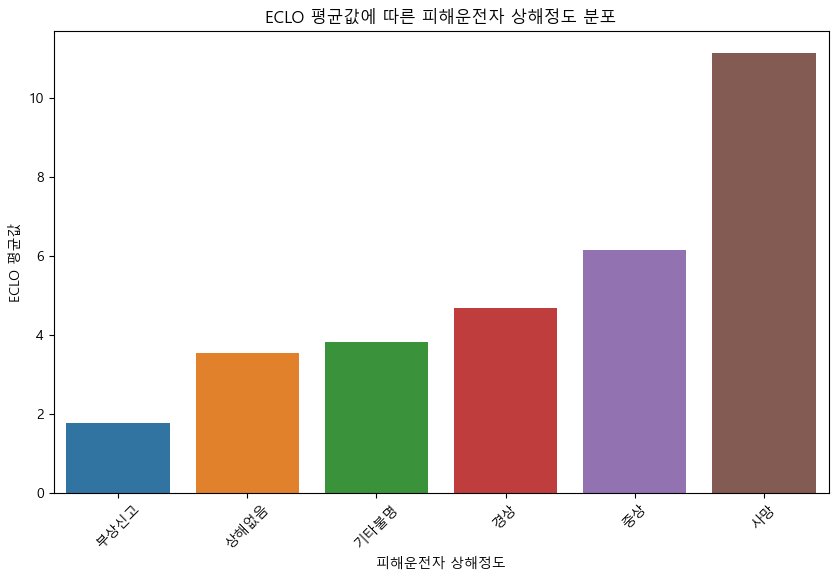

In [15]:
#각 범주형 변수에 대해 ECLO의 평균값 계산 및 시각화
for column in categorical_columns_4:
    plt.figure(figsize = (10,6))
    data_grouped = data.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

##전체는 너무 많아서 3,000개의 행으로 EDA를 진행함

ID 분포 -> 삭제<br>
사고일시 -> 삭제<br>
요일 분포 -> 평일, 주말 (주말을 가중치 조금 더 높게)<br>
기상상태 분포 - 안개,기타, 비 / 맑음, 흐림<br>
시군구 분포 -> 구로 나눠서 다시 진행 해보기<br>
도로형태 -> 단일로 / 교차로 / 기타, 주차장, 미분류 (순서 중요)<br>
노면상태 -> 젖음, 습기 / 서리, 결빙 / 건조 / 기타 (차이가 크지는 않음)<br>
사고유형 -> 차대차 / 차량단독, 차대사람<br>
사고유형 -> 추돌, 정면추돌 / 측면출동, 전도전복 - 전복, 도로외이탈 - 추락, 전도전복 - 전도 / 후진중충돌, 횡단중, 기타, 보도통행중, 차도통행중, 공작물출동 / 길가장자리구역통행증 / 도로외이탈 - 기타<br>
법규위반 -> 과속, 신호위반, 안전거리미확보 / 중앙선침범, 교차로운행방법위반, 직진우회전진행방해 / 안전운전불이행, 차로위반, 보행자보호의무위반, 불법유턴, 기타<br>
가해운전자 차종-> 특수, 건설기계 / 승용, 승합, 화물 / 이륜, 원동기 / 자전거, 기타불명, 사륜오토바이(ATV)<br>
가해운전자 성별-> 삭제<br>
가해운전자 연령 -> 중요함 (수치로 확인)<br>
가해운전자 상해정도 -> 사망 / 중상, 경상 / 상해없음, 기타불명, 부상신고<br>
피해운전자 차종 -> 승합 / 건설,기계, 특수, 승용, 화물 / 개인형이동수단(PM), 원동기, 자전거, 이륜, 보행자 / 기타불명, 사륜오토바이(ATV)<br>
피해운전자 성별 -> 삭제<br>
피해운전자 연령 -> 중요함(?)수치 화인<br>
피해운전자 상해정도 -> 사망 / 중상, 경상 / 기타불명, 상해없음, 부상신고<br>



In [16]:
for column in categorical_columns_1:
    avg_eclo_per_category = data.groupby(column)['ECLO'].mean().sort_values(ascending=False)
    print(f"{column}별 ECLO 평균값:")
    print(avg_eclo_per_category)
    print("\n")

요일별 ECLO 평균값:
요일
일요일    5.210258
토요일    4.920811
월요일    4.698049
화요일    4.627926
수요일    4.627408
금요일    4.600906
목요일    4.560688
Name: ECLO, dtype: float64


기상상태별 ECLO 평균값:
기상상태
안개    5.500000
기타    4.946429
비     4.895699
흐림    4.779150
맑음    4.712888
눈     4.625000
Name: ECLO, dtype: float64


시군구별 ECLO 평균값:
시군구
달성군    5.072280
동구     4.889534
서구     4.775680
수성구    4.727300
북구     4.687669
남구     4.623681
달서구    4.618441
중구     4.541610
Name: ECLO, dtype: float64




In [17]:
for column in categorical_columns_2:
    avg_eclo_per_category = data.groupby(column)['ECLO'].mean().sort_values(ascending=False)
    print(f"{column}별 ECLO 평균값:")
    print(avg_eclo_per_category)
    print("\n")

도로형태별 ECLO 평균값:
도로형태
단일로 - 터널           6.578125
단일로 - 고가도로위        5.615942
단일로 - 교량           5.211207
교차로 - 교차로안         5.006142
교차로 - 교차로부근        4.863035
단일로 - 기타           4.653990
단일로 - 지하차도(도로)내    4.576052
교차로 - 교차로횡단보도내     4.122795
기타 - 기타            4.065962
미분류 - 미분류          3.750000
주차장 - 주차장          3.716102
Name: ECLO, dtype: float64


노면상태별 ECLO 평균값:
노면상태
침수       5.666667
젖음/습기    4.906452
건조       4.712878
서리/결빙    4.160000
기타       4.086207
적설       3.000000
Name: ECLO, dtype: float64


사고유형별 ECLO 평균값:
사고유형
차대차     4.944597
차량단독    4.006054
차대사람    3.817650
Name: ECLO, dtype: float64


사고유형 - 세부분류별 ECLO 평균값:
사고유형 - 세부분류
도로외이탈 - 추락    6.750000
전도전복 - 전복     5.900000
추돌            5.572812
정면충돌          5.540024
측면충돌          4.918557
공작물충돌         4.611111
횡단중           4.227589
기타            4.226623
후진중충돌         3.955954
차도통행중         3.907468
보도통행중         3.786260
전도전복 - 전도     3.472222
길가장자리구역통행중    3.152034
도로외이탈 - 기타    2.000000
Name: ECLO, dtype: float64

In [18]:
for column in categorical_columns_3:
    avg_eclo_per_category = data.groupby(column)['ECLO'].mean().sort_values(ascending=False)
    print(f"{column}별 ECLO 평균값:")
    print(avg_eclo_per_category)
    print("\n")

가해운전자 차종별 ECLO 평균값:
가해운전자 차종
건설기계           5.282353
화물             4.974752
승용             4.912151
승합             4.890262
특수             4.884956
이륜             4.264239
원동기            4.004329
개인형이동수단(PM)    3.354651
농기계            3.333333
자전거            3.105348
사륜오토바이(ATV)    2.900000
기타불명           2.734151
Name: ECLO, dtype: float64


가해운전자 성별별 ECLO 평균값:
가해운전자 성별
여       4.790513
남       4.773165
기타불명    2.738337
Name: ECLO, dtype: float64


가해운전자 연령별 ECLO 평균값:
가해운전자 연령
98세 이상    15.000000
89세        5.222222
19세        5.140056
84세        5.125000
27세        5.103208
            ...    
8세         2.600000
7세         2.555556
10세        2.529412
9세         2.428571
4세         1.000000
Name: ECLO, Length: 89, dtype: float64


가해운전자 상해정도별 ECLO 평균값:
가해운전자 상해정도
사망      12.478261
중상       7.615713
경상       6.605675
상해없음     4.518407
기타불명     3.879968
부상신고     3.277055
Name: ECLO, dtype: float64


피해운전자 차종별 ECLO 평균값:
피해운전자 차종
농기계            7.000000
승합             6.016749
특수      

In [19]:
# '가해운전자 연령' 열에서 각 값의 빈도수를 계산
value_counts = data['가해운전자 연령'].value_counts()

# 빈도수가 가장 많은 순서대로 출력
sorted_counts = value_counts.sort_values(ascending=False)

for value, count in sorted_counts.items():
    print(f'{value}: {count} 건')


60세: 1031 건
미분류: 994 건
58세: 977 건
53세: 956 건
57세: 943 건
51세: 917 건
59세: 914 건
54세: 912 건
52세: 887 건
61세: 886 건
62세: 883 건
56세: 864 건
55세: 849 건
50세: 835 건
63세: 824 건
64세: 813 건
49세: 805 건
48세: 795 건
47세: 752 건
27세: 717 건
46세: 715 건
65세: 692 건
28세: 678 건
45세: 674 건
66세: 669 건
38세: 667 건
26세: 666 건
44세: 665 건
29세: 619 건
25세: 616 건
40세: 610 건
39세: 610 건
30세: 606 건
43세: 600 건
41세: 592 건
67세: 590 건
37세: 568 건
31세: 563 건
36세: 550 건
42세: 544 건
23세: 543 건
24세: 538 건
33세: 528 건
34세: 522 건
68세: 501 건
32세: 499 건
35세: 498 건
69세: 471 건
70세: 430 건
22세: 425 건
71세: 424 건
21세: 381 건
72세: 364 건
19세: 357 건
20세: 326 건
18세: 319 건
73세: 283 건
76세: 246 건
74세: 222 건
75세: 195 건
77세: 188 건
17세: 170 건
16세: 167 건
78세: 153 건
79세: 132 건
80세: 86 건
81세: 81 건
82세: 69 건
15세: 65 건
83세: 54 건
14세: 51 건
84세: 48 건
85세: 32 건
13세: 30 건
12세: 27 건
86세: 26 건
11세: 23 건
87세: 18 건
10세: 17 건
9세: 14 건
7세: 9 건
89세: 9 건
88세: 9 건
8세: 5 건
90세: 2 건
4세: 1 건
90세 이상: 1 건
98세 이상: 1 건
5세: 1 건


In [20]:
for column in categorical_columns_4:
    avg_eclo_per_category = data.groupby(column)['ECLO'].mean().sort_values(ascending=False)
    print(f"{column}별 ECLO 평균값:")
    print(avg_eclo_per_category)
    print("\n")

피해운전자 성별별 ECLO 평균값:
피해운전자 성별
남       4.798328
여       4.623009
기타불명    3.030769
Name: ECLO, dtype: float64


피해운전자 연령별 ECLO 평균값:
피해운전자 연령
91세       6.750000
89세       5.466667
81세       5.107143
20세       5.103286
48세       5.096447
            ...   
2세        3.181818
92세       3.000000
93세       3.000000
미분류       2.942029
98세 이상    1.000000
Name: ECLO, Length: 97, dtype: float64


피해운전자 상해정도별 ECLO 평균값:
피해운전자 상해정도
사망      11.143678
중상       6.148072
경상       4.688504
기타불명     3.828221
상해없음     3.555478
부상신고     1.760554
Name: ECLO, dtype: float64




In [21]:
# '피해운전자 연령' 열에서 각 값의 빈도수를 계산
value_counts = data['피해운전자 연령'].value_counts()

# 빈도수가 가장 많은 순서대로 출력
sorted_counts = value_counts.sort_values(ascending=False)

for value, count in sorted_counts.items():
    print(f'{value}: {count} 건')


59세: 867 건
57세: 844 건
26세: 816 건
50세: 815 건
58세: 809 건
60세: 793 건
27세: 792 건
48세: 788 건
39세: 783 건
28세: 777 건
52세: 771 건
49세: 766 건
25세: 750 건
51세: 750 건
61세: 741 건
47세: 738 건
29세: 728 건
37세: 728 건
54세: 727 건
56세: 720 건
46세: 718 건
55세: 717 건
53세: 712 건
38세: 706 건
36세: 679 건
30세: 675 건
45세: 670 건
44세: 669 건
62세: 668 건
31세: 667 건
40세: 663 건
41세: 655 건
63세: 647 건
24세: 640 건
33세: 636 건
23세: 635 건
42세: 633 건
34세: 631 건
43세: 627 건
35세: 624 건
32세: 620 건
22세: 598 건
64세: 567 건
65세: 535 건
21세: 488 건
66세: 468 건
19세: 456 건
20세: 426 건
67세: 400 건
68세: 387 건
18세: 378 건
69세: 337 건
70세: 315 건
71세: 282 건
72세: 274 건
17세: 266 건
73세: 247 건
74세: 191 건
75세: 181 건
76세: 172 건
16세: 161 건
77세: 158 건
78세: 153 건
79세: 128 건
81세: 112 건
8세: 108 건
10세: 107 건
80세: 104 건
12세: 98 건
13세: 95 건
7세: 95 건
9세: 94 건
82세: 89 건
11세: 88 건
83세: 86 건
15세: 78 건
14세: 71 건
미분류: 69 건
84세: 58 건
6세: 49 건
85세: 48 건
86세: 40 건
5세: 40 건
87세: 24 건
4세: 20 건
89세: 15 건
90세 이상: 13 건
88세: 13 건
2세: 11 건
3세: 10 건
1세: 5 건
90세: 5 건
91세: 4 건
93세: 2 건
94

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],

##train data / test data 함께 전처리 진행

In [22]:
test.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,수성구,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,수성구,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,수성구,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,수성구,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,달서구,교차로 - 교차로안,건조,차대차


In [23]:
#data drop
data = data.drop(['ID', '사고일시', '가해운전자 성별', '피해운전자 성별' ], axis = 1)
test = test.drop(['ID', '사고일시'], axis = 1)




#범주형 데이터를 ECLO 평균값으로 대체해서 넣음 -> 좋은 방법은 아님

In [24]:
eclo_means = {
    '요일': {'일요일': 5.210258, '토요일': 4.920811, '월요일': 4.698049, '화요일': 4.627926, '수요일': 4.627408, '금요일': 4.600906, '목요일': 4.560688},
    '기상상태': {'안개': 5.500000, '기타': 4.946429, '비': 4.895699, '흐림': 4.779150, '맑음': 4.712888, '눈': 4.625000},
    '시군구': {'달성군': 5.072280, '동구': 4.889534, '서구': 4.775680, '수성구': 4.727300, '북구': 4.687669, '남구': 4.623681, '달서구': 4.618441, '중구': 4.541610},
    '도로형태': {'단일로 - 터널': 6.578125, '단일로 - 고가도로위': 5.615942, '단일로 - 교량': 5.211207, '교차로 - 교차로안': 5.006142, '교차로 - 교차로부근': 4.863035, '단일로 - 기타': 4.653990, '단일로 - 지하차도(도로)내': 4.576052, '교차로 - 교차로횡단보도내': 4.122795, '기타 - 기타': 4.065962, '미분류 - 미분류': 3.750000, '주차장 - 주차장': 3.716102},
    '노면상태': {'침수': 5.666667, '젖음/습기': 4.906452, '건조': 4.712878, '서리/결빙': 4.160000, '기타': 4.086207, '적설': 3.000000},
    '사고유형': {'차대차': 4.944597, '차량단독': 4.006054, '차대사람': 3.817650},
    '사고유형 - 세부분류': {'도로외이탈 - 추락': 6.750000, '전도전복 - 전복': 5.900000, '추돌': 5.572812, '정면충돌': 5.540024, '측면충돌': 4.918557, '공작물충돌': 4.611111, '횡단중': 4.227589, '기타': 4.226623, '후진중충돌': 3.955954, '차도통행중': 3.907468, '보도통행중': 3.786260, '전도전복 - 전도': 3.472222, '길가장자리구역통행중': 3.152034, '도로외이탈 - 기타': 2.000000},
    '법규위반': {'과속': 8.233083, '중앙선침범': 5.552781, '신호위반': 5.427100, '안전거리미확보': 5.093993, '교차로운행방법위반': 5.019636, '차로위반': 4.990516, '직진우회전진행방해': 4.982653, '안전운전불이행': 4.484001, '불법유턴': 4.398126, '기타': 4.131089, '보행자보호의무위반': 4.025130},
    '가해운전자 차종': {'건설기계': 5.282353, '화물': 4.974752, '승용': 4.912151, '승합': 4.890262, '특수': 4.884956, '이륜': 4.264239, '원동기': 4.004329, '개인형이동수단(PM)': 3.354651, '농기계': 3.333333, '자전거': 3.105348, '사륜오토바이(ATV)': 2.900000, '기타불명': 2.734151},
    '가해운전자 성별': {'여': 4.790513, '남': 4.773165, '기타불명': 2.738337},
    # '가해운전자 연령': {'98세 이상': 15.000000, '89세': 5.222222, '19세': 5.140056, '84세': 5.125000, '27세': 5.103208, '20세': 5.000000, '30세': 4.986111},
    '가해운전자 상해정도': {'사망': 12.478261, '중상': 7.615713, '경상': 6.605675, '상해없음': 4.518407, '기타불명': 3.879968, '부상신고': 3.277055},
    '피해운전자 차종': {'농기계': 7.000000, '승합': 6.016749, '특수': 5.780822, '승용': 5.267782, '사륜오토바이(ATV)': 5.045455, '화물': 4.969712, '건설기계': 4.525000, '이륜': 4.126320, '원동기': 3.960413, '개인형이동수단(PM)': 3.914634, '보행자': 3.817650, '자전거': 3.750583, '기타불명': 2.965116},
    '피해운전자 성별': {'남': 4.798328, '여': 4.623009, '기타불명': 3.030769},
    '피해운전자 상해정도': {'사망': 11.143678, '중상': 6.148072, '경상': 4.688504, '기타불명': 3.828221, '상해없음': 3.555478, '부상신고': 1.760554}
}

In [25]:
#train data 전처리

data['요일'] = data['요일'].map(eclo_means['요일'])
data['기상상태'] = data['기상상태'].map(eclo_means['기상상태'])
data['시군구'] = data['시군구'].map(eclo_means['시군구'])
data['도로형태'] = data['도로형태'].map(eclo_means['도로형태'])
data['노면상태'] = data['노면상태'].map(eclo_means['노면상태'])
data['사고유형'] = data['사고유형'].map(eclo_means['사고유형'])
data['사고유형 - 세부분류'] = data['사고유형 - 세부분류'].map(eclo_means['사고유형 - 세부분류'])
data['법규위반'] = data['법규위반'].map(eclo_means['법규위반'])
data['가해운전자 차종'] = data['가해운전자 차종'].map(eclo_means['가해운전자 차종'])
# data['가해운전자 성별'] = data['가해운전자 성별'].map(eclo_means['가해운전자 성별'])
data['가해운전자 상해정도'] = data['가해운전자 상해정도'].map(eclo_means['가해운전자 상해정도'])
data['피해운전자 차종'] = data['피해운전자 차종'].map(eclo_means['피해운전자 차종'])
# data['피해운전자 성별'] = data['피해운전자 성별'].map(eclo_means['피해운전자 성별'])
data['피해운전자 상해정도'] = data['피해운전자 상해정도'].map(eclo_means['피해운전자 상해정도'])

#test data 전처리 (#요일, 기상상태, 시군구, 도로형태, 노면상태, 사고유형)
test['요일'] = test['요일'].map(eclo_means['요일'])
test['기상상태'] = test['기상상태'].map(eclo_means['기상상태'])
test['시군구'] = test['시군구'].map(eclo_means['시군구'])
test['도로형태'] = test['도로형태'].map(eclo_means['도로형태'])
test['노면상태'] = test['노면상태'].map(eclo_means['노면상태'])
test['사고유형'] = test['사고유형'].map(eclo_means['사고유형'])

In [26]:
data

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,4.627926,4.712888,4.541610,4.653990,4.712878,3.817650,3.152034,4.484001,4.912151,51세,4.518407,3.817650,70세,6.148072,0,1,0,0,5
1,4.627926,4.779150,4.618441,4.653990,4.712878,3.817650,3.786260,4.131089,4.912151,39세,4.518407,3.817650,61세,4.688504,0,0,1,0,3
2,4.627926,4.712888,4.727300,4.653990,4.712878,3.817650,3.907468,4.484001,4.912151,70세,4.518407,3.817650,38세,4.688504,0,0,1,0,3
3,4.627926,4.712888,4.687669,4.653990,4.712878,4.944597,5.572812,4.484001,4.912151,49세,4.518407,5.267782,36세,6.148072,0,1,0,0,5
4,4.627926,4.712888,4.889534,4.653990,4.712878,4.944597,5.572812,4.484001,4.912151,30세,4.518407,5.267782,52세,4.688504,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,4.600906,4.712888,4.727300,5.006142,4.712878,4.944597,4.918557,5.427100,4.912151,52세,4.518407,4.126320,28세,4.688504,0,0,1,0,3
39605,4.600906,4.712888,4.618441,4.653990,4.712878,4.944597,4.918557,5.093993,4.912151,60세,4.518407,5.267782,52세,4.688504,0,0,1,0,3
39606,4.600906,4.712888,4.618441,5.006142,4.712878,4.944597,4.918557,5.019636,4.912151,60세,7.615713,5.267782,73세,6.148072,0,2,0,0,10
39607,4.600906,4.712888,4.618441,4.065962,4.712878,4.944597,5.572812,4.484001,4.912151,40세,4.518407,5.267782,57세,4.688504,0,0,1,0,3


In [27]:
test

,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,4.920811,4.712888,4.727300,5.006142,4.712878,3.817650
1,4.920811,4.712888,4.727300,4.653990,4.712878,3.817650
2,4.920811,4.712888,4.727300,5.006142,4.712878,4.944597
3,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
4,4.920811,4.712888,4.618441,5.006142,4.712878,4.944597
...,...,...,...,...,...,...
10958,4.920811,4.712888,4.623681,6.578125,4.712878,4.944597
10959,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
10960,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
10961,4.920811,4.712888,4.727300,4.863035,4.712878,4.944597


#연령대 encoding 진행 (~대)

#가해운전자 연령이 미분류인 값 지우기

In [28]:
data = data[data["가해운전자 연령"] != "미분류"]
data = data[data["피해운전자 연령"] != "미분류"]

#피해운전자 nan값 처리

In [29]:
data = data.dropna(subset=['피해운전자 연령'])

In [30]:
import re
# 데이터 열에서 숫자만 추출하여 새로운 열 생성
def extract_age(text):
    match = re.search(r'\d+', text)
    if match:
        return int(match.group(0))
    else:
        return None  # 일치하는 패턴이 없으면 None 반환

data['가해운전자 연령'] = data['가해운전자 연령'].apply(extract_age)
data['피해운전자 연령'] = data['피해운전자 연령'].apply(extract_age)

# 연령대 그룹 생성
age_intervals = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 999]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90 이상']

# 연령대 라벨링 함수
def categorize_age(age):
    for i in range(len(age_intervals) - 1):
        if age_intervals[i] <= age <= age_intervals[i + 1]:
            return age_labels[i]

# 연령대 라벨링 열 추가
data['가해운전자 연령'] = data['가해운전자 연령'].apply(categorize_age)
data['피해운전자 연령'] = data['피해운전자 연령'].apply(categorize_age)

# ECLO 값에 대한 연령대별 평균 계산
eclo_age_mean_attack = data.groupby('가해운전자 연령')['ECLO'].mean()
eclo_age_mean_defensive = data.groupby('피해운전자 연령')['ECLO'].mean()

# 결과 출력
print(eclo_age_mean_attack)
print(eclo_age_mean_defensive)

가해운전자 연령
0-9      2.571429
10-19    4.598268
20-29    4.887248
30-39    4.872019
40-49    4.796974
50-59    4.780294
60-69    4.840347
70-79    4.585375
80-89    4.579327
90 이상    6.500000
Name: ECLO, dtype: float64
피해운전자 연령
0-9      3.604369
10-19    4.401891
20-29    4.730181
30-39    4.796036
40-49    4.936101
50-59    4.827175
60-69    4.880842
70-79    4.865517
80-89    4.762742
90 이상    4.464286
Name: ECLO, dtype: float64


In [31]:
data

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,4.627926,4.712888,4.541610,4.653990,4.712878,3.817650,3.152034,4.484001,4.912151,50-59,4.518407,3.817650,70-79,6.148072,0,1,0,0,5
1,4.627926,4.779150,4.618441,4.653990,4.712878,3.817650,3.786260,4.131089,4.912151,30-39,4.518407,3.817650,60-69,4.688504,0,0,1,0,3
2,4.627926,4.712888,4.727300,4.653990,4.712878,3.817650,3.907468,4.484001,4.912151,70-79,4.518407,3.817650,30-39,4.688504,0,0,1,0,3
3,4.627926,4.712888,4.687669,4.653990,4.712878,4.944597,5.572812,4.484001,4.912151,40-49,4.518407,5.267782,30-39,6.148072,0,1,0,0,5
4,4.627926,4.712888,4.889534,4.653990,4.712878,4.944597,5.572812,4.484001,4.912151,30-39,4.518407,5.267782,50-59,4.688504,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,4.600906,4.712888,4.727300,5.006142,4.712878,4.944597,4.918557,5.427100,4.912151,50-59,4.518407,4.126320,20-29,4.688504,0,0,1,0,3
39605,4.600906,4.712888,4.618441,4.653990,4.712878,4.944597,4.918557,5.093993,4.912151,60-69,4.518407,5.267782,50-59,4.688504,0,0,1,0,3
39606,4.600906,4.712888,4.618441,5.006142,4.712878,4.944597,4.918557,5.019636,4.912151,60-69,7.615713,5.267782,70-79,6.148072,0,2,0,0,10
39607,4.600906,4.712888,4.618441,4.065962,4.712878,4.944597,5.572812,4.484001,4.912151,40-49,4.518407,5.267782,50-59,4.688504,0,0,1,0,3


In [32]:
# 가해운전자 연령 변환
age_mapping_attack = {
    '0-9': 2.571429,
    '10-19': 4.598268,
    '20-29': 4.887248,
    '30-39': 4.872019,
    '40-49': 4.796974,
    '50-59': 4.780294,
    '60-69': 4.840347,
    '70-79': 4.585375,
    '80-89': 4.579327,
    '90 이상': 6.500000
}

data['가해운전자 연령'] = data['가해운전자 연령'].map(age_mapping_attack)

# 피해운전자 연령 변환
age_mapping_defensive = {
    '0-9': 3.604369,
    '10-19': 4.401891,
    '20-29': 4.730181,
    '30-39': 4.796036,
    '40-49': 4.936101,
    '50-59': 4.827175,
    '60-69': 4.880842,
    '70-79': 4.865517,
    '80-89': 4.762742,
    '90 이상': 4.464286
}

data['피해운전자 연령'] = data['피해운전자 연령'].map(age_mapping_defensive)

# 결과 확인
print(data[['가해운전자 연령', '피해운전자 연령']])


       가해운전자 연령  피해운전자 연령
0      4.780294  4.865517
1      4.872019  4.880842
2      4.585375  4.796036
3      4.796974  4.796036
4      4.872019  4.827175
...         ...       ...
39604  4.780294  4.730181
39605  4.840347  4.827175
39606  4.840347  4.865517
39607  4.796974  4.827175
39608  4.887248  4.796036

[37567 rows x 2 columns]


In [33]:
data = data.dropna()
data.shape

(37567, 19)

In [34]:
data

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,4.627926,4.712888,4.541610,4.653990,4.712878,3.817650,3.152034,4.484001,4.912151,4.780294,4.518407,3.817650,4.865517,6.148072,0,1,0,0,5
1,4.627926,4.779150,4.618441,4.653990,4.712878,3.817650,3.786260,4.131089,4.912151,4.872019,4.518407,3.817650,4.880842,4.688504,0,0,1,0,3
2,4.627926,4.712888,4.727300,4.653990,4.712878,3.817650,3.907468,4.484001,4.912151,4.585375,4.518407,3.817650,4.796036,4.688504,0,0,1,0,3
3,4.627926,4.712888,4.687669,4.653990,4.712878,4.944597,5.572812,4.484001,4.912151,4.796974,4.518407,5.267782,4.796036,6.148072,0,1,0,0,5
4,4.627926,4.712888,4.889534,4.653990,4.712878,4.944597,5.572812,4.484001,4.912151,4.872019,4.518407,5.267782,4.827175,4.688504,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,4.600906,4.712888,4.727300,5.006142,4.712878,4.944597,4.918557,5.427100,4.912151,4.780294,4.518407,4.126320,4.730181,4.688504,0,0,1,0,3
39605,4.600906,4.712888,4.618441,4.653990,4.712878,4.944597,4.918557,5.093993,4.912151,4.840347,4.518407,5.267782,4.827175,4.688504,0,0,1,0,3
39606,4.600906,4.712888,4.618441,5.006142,4.712878,4.944597,4.918557,5.019636,4.912151,4.840347,7.615713,5.267782,4.865517,6.148072,0,2,0,0,10
39607,4.600906,4.712888,4.618441,4.065962,4.712878,4.944597,5.572812,4.484001,4.912151,4.796974,4.518407,5.267782,4.827175,4.688504,0,0,1,0,3


In [35]:
target = data['ECLO']
train = data.iloc[:, :-5]

In [36]:
target

0         5
1         3
2         3
3         5
4         3
         ..
39604     3
39605     3
39606    10
39607     3
39608     6
Name: ECLO, Length: 37567, dtype: int64

In [37]:
train

,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 연령,피해운전자 상해정도
0,4.627926,4.712888,4.541610,4.653990,4.712878,3.817650,3.152034,4.484001,4.912151,4.780294,4.518407,3.817650,4.865517,6.148072
1,4.627926,4.779150,4.618441,4.653990,4.712878,3.817650,3.786260,4.131089,4.912151,4.872019,4.518407,3.817650,4.880842,4.688504
2,4.627926,4.712888,4.727300,4.653990,4.712878,3.817650,3.907468,4.484001,4.912151,4.585375,4.518407,3.817650,4.796036,4.688504
3,4.627926,4.712888,4.687669,4.653990,4.712878,4.944597,5.572812,4.484001,4.912151,4.796974,4.518407,5.267782,4.796036,6.148072
4,4.627926,4.712888,4.889534,4.653990,4.712878,4.944597,5.572812,4.484001,4.912151,4.872019,4.518407,5.267782,4.827175,4.688504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,4.600906,4.712888,4.727300,5.006142,4.712878,4.944597,4.918557,5.427100,4.912151,4.780294,4.518407,4.126320,4.730181,4.688504
39605,4.600906,4.712888,4.618441,4.653990,4.712878,4.944597,4.918557,5.093993,4.912151,4.840347,4.518407,5.267782,4.827175,4.688504
39606,4.600906,4.712888,4.618441,5.006142,4.712878,4.944597,4.918557,5.019636,4.912151,4.840347,7.615713,5.267782,4.865517,6.148072
39607,4.600906,4.712888,4.618441,4.065962,4.712878,4.944597,5.572812,4.484001,4.912151,4.796974,4.518407,5.267782,4.827175,4.688504


#vif 진행

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train)

# 표준화된 데이터를 DataFrame으로 변환
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train.columns)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X_train_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

# VIF 출력
print(vif)


       Features       VIF
0            요일  1.001644
1          기상상태  2.315992
2           시군구  1.014009
3          도로형태  1.092564
4          노면상태  2.318574
5          사고유형  2.108775
6   사고유형 - 세부분류  1.508791
7          법규위반  1.131092
8      가해운전자 차종  1.137329
9      가해운전자 연령  1.035567
10   가해운전자 상해정도  1.071865
11     피해운전자 차종  1.847900
12     피해운전자 연령  1.080245
13   피해운전자 상해정도  1.151922


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(22539, 14) (7514, 14) (7514, 14) (22539,) (7514,) (7514,)


In [40]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error

In [41]:
# 모델 학습

reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

#2가리로 predict, val_predict하는 것이 좋음 (둘 다 해야지 overfitting인지 아닌지 알 수 있음)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print("1. Linear Regression\t, train = %.4f, val = %.4f" %(mse_train, mse_val))
print("2. Lasso\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))
print("3. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train3, mse_val3))
print("4. XGBoost\t\t, train = %.4f, val = %.4f" %(mse_train4, mse_val4)) #xgb값이 강사님이랑 다름
print("5. LightGBM\t\t, train = %.4f, val = %.4f" %(mse_train5, mse_val5))

#값이 낮아야 좋은것(error 값이니)
#lasso가 안 좋음

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 22539, number of used features: 14
[LightGBM] [Info] Start training from score 4.798261
1. Linear Regression	, train = 7.4499, val = 7.1599
2. Lasso		, train = 10.3500, val = 10.2855
3. Ridge		, train = 7.4499, val = 7.1598
4. XGBoost		, train = 4.3194, val = 6.9937
5. LightGBM		, train = 5.6888, val = 6.4804


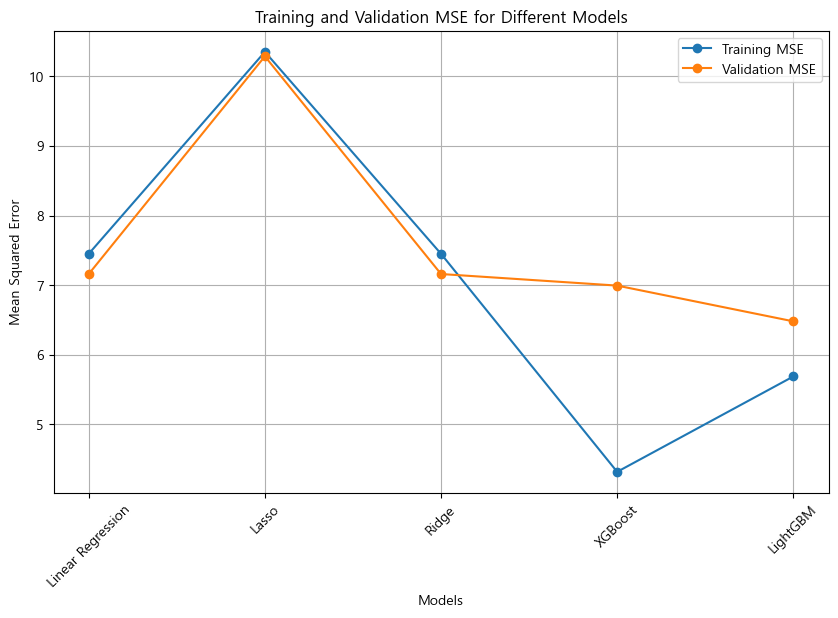

In [42]:
import matplotlib.pyplot as plt

# Store the MSE values
models = ['Linear Regression', 'Lasso', 'Ridge', 'XGBoost', 'LightGBM']
mse_train_values = [mse_train, mse_train2, mse_train3, mse_train4, mse_train5]
mse_val_values = [mse_val, mse_val2, mse_val3, mse_val4, mse_val5]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models, mse_train_values, label='Training MSE', marker='o')
plt.plot(models, mse_val_values, label='Validation MSE', marker='o')

# Adding titles and labels
plt.title('Training and Validation MSE for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)  # Rotating model names for better readability
plt.legend()
plt.grid(True)
plt.show()


[0]	validation_0-rmse:4.19712	validation_1-rmse:4.21055
[1]	validation_0-rmse:3.46874	validation_1-rmse:3.47813
[2]	validation_0-rmse:3.04156	validation_1-rmse:3.05556
[3]	validation_0-rmse:2.80108	validation_1-rmse:2.82460
[4]	validation_0-rmse:2.65641	validation_1-rmse:2.70813
[5]	validation_0-rmse:2.58112	validation_1-rmse:2.64484
[6]	validation_0-rmse:2.52606	validation_1-rmse:2.61146
[7]	validation_0-rmse:2.49262	validation_1-rmse:2.59532
[8]	validation_0-rmse:2.47388	validation_1-rmse:2.58473
[9]	validation_0-rmse:2.45580	validation_1-rmse:2.57653
[10]	validation_0-rmse:2.44466	validation_1-rmse:2.57274


c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[11]	validation_0-rmse:2.42619	validation_1-rmse:2.57628
[12]	validation_0-rmse:2.41418	validation_1-rmse:2.57771
[13]	validation_0-rmse:2.41128	validation_1-rmse:2.57931
[14]	validation_0-rmse:2.40471	validation_1-rmse:2.57818
[15]	validation_0-rmse:2.38960	validation_1-rmse:2.58623
[16]	validation_0-rmse:2.37316	validation_1-rmse:2.58899
[17]	validation_0-rmse:2.36851	validation_1-rmse:2.58994
[18]	validation_0-rmse:2.36527	validation_1-rmse:2.59112
[19]	validation_0-rmse:2.35979	validation_1-rmse:2.58855
[20]	validation_0-rmse:2.35005	validation_1-rmse:2.58659
[21]	validation_0-rmse:2.34786	validation_1-rmse:2.58821
[22]	validation_0-rmse:2.34453	validation_1-rmse:2.58990
[23]	validation_0-rmse:2.33751	validation_1-rmse:2.59128
[24]	validation_0-rmse:2.33383	validation_1-rmse:2.59083
[25]	validation_0-rmse:2.33221	validation_1-rmse:2.59030
[26]	validation_0-rmse:2.32992	validation_1-rmse:2.58860
[27]	validation_0-rmse:2.32399	validation_1-rmse:2.59040
[28]	validation_0-rmse:2.32363	

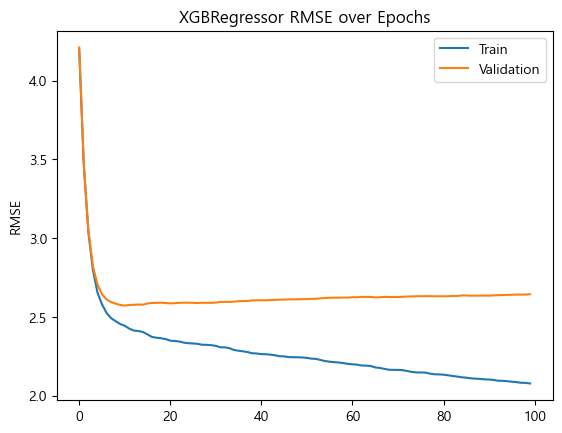

In [43]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

reg_xgb = XGBRegressor()
eval_set = [(X_train, y_train), (X_val, y_val)]
reg_xgb.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()


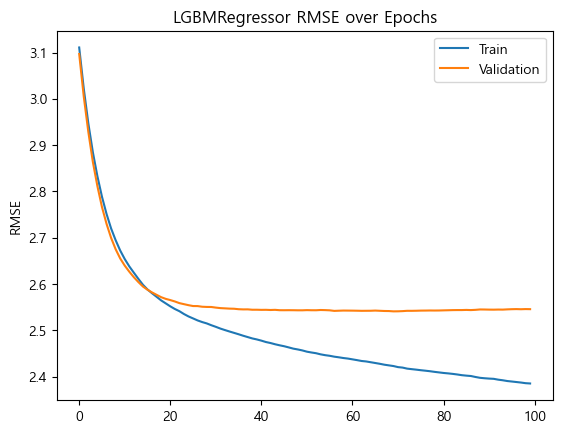

In [44]:
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_train, y_train), (X_val, y_val)]

# Fit the model
reg_lgbm.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set)

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['training']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()


In [45]:
#prediction
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)


In [46]:
print("Linear Regression 훈련 세트 예측값:")
print(pred_train)

print("Lasso 훈련 세트 예측값:")
print(pred_train2)

print("Ridge 훈련 세트 예측값:")
print(pred_train3)

print("XGBoost 훈련 세트 예측값:")
print(pred_train4)

print("LightGBM 훈련 세트 예측값:")
print(pred_train5)


Linear Regression 훈련 세트 예측값:
[4.34540649 4.5206809  8.08041693 ... 2.02034479 4.11113691 3.19235592]
Lasso 훈련 세트 예측값:
[4.79826079 4.79826079 4.79826079 ... 4.79826079 4.79826079 4.79826079]
Ridge 훈련 세트 예측값:
[4.34581756 4.52092343 8.08039854 ... 2.02062622 4.11088345 3.19289845]
XGBoost 훈련 세트 예측값:
[ 4.3145766  3.6892593 10.720362  ...  3.1822004  4.2513347  3.0784905]
LightGBM 훈련 세트 예측값:
[4.19653646 4.11951894 9.72637215 ... 3.06037273 3.99893478 3.07088971]


In [47]:
print("Linear Regression 검증 세트 예측값:")
print(pred_val)

print("Lasso 검증 세트 예측값:")
print(pred_val2)

print("Ridge 검증 세트 예측값:")
print(pred_val3)

print("XGBoost 검증 세트 예측값:")
print(pred_val4)

print("LightGBM 검증 세트 예측값:")
print(pred_val5)


Linear Regression 검증 세트 예측값:
[4.81385836 3.59712081 5.69657291 ... 0.33088716 3.25559165 6.30159914]
Lasso 검증 세트 예측값:
[4.79826079 4.79826079 4.79826079 ... 4.79826079 4.79826079 4.79826079]
Ridge 검증 세트 예측값:
[4.8135716  3.59709425 5.69549196 ... 0.33192353 3.25604624 6.30089416]
XGBoost 검증 세트 예측값:
[4.9837527 2.9795952 9.935869  ... 1.2890774 3.1961179 8.080416 ]
LightGBM 검증 세트 예측값:
[5.05523713 3.11820342 7.18265329 ... 1.16245077 3.14020549 6.52897525]


In [48]:
#summary
print('----------Linear Regression ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result))

print('----------Lasso ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result2))

print('----------Ridge ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result3))

print('----------XGBoost ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result4))

print('----------LightGBM ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result5))


----------Linear Regression ----------
MSE in training: 7.1657
----------Lasso ----------
MSE in training: 10.1915
----------Ridge ----------
MSE in training: 7.1658
----------XGBoost ----------
MSE in training: 6.9509
----------LightGBM ----------
MSE in training: 6.5574


In [49]:
from sklearn.metrics import r2_score

# 각 모델의 R² 점수 계산
r2_train_reg = r2_score(y_train, pred_train)
r2_val_reg = r2_score(y_val, pred_val)

r2_train_reg2 = r2_score(y_train, pred_train2)
r2_val_reg2 = r2_score(y_val, pred_val2)

r2_train_reg3 = r2_score(y_train, pred_train3)
r2_val_reg3 = r2_score(y_val, pred_val3)

r2_train_reg4 = r2_score(y_train, pred_train4)
r2_val_reg4 = r2_score(y_val, pred_val4)

r2_train_reg5 = r2_score(y_train, pred_train5)
r2_val_reg5 = r2_score(y_val, pred_val5)

# 결과 출력
print("1. Linear Regression R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg * 100, r2_val_reg * 100))
print("2. Lasso R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg2 * 100, r2_val_reg2 * 100))
print("3. Ridge R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg3 * 100, r2_val_reg3 * 100))
print("4. XGBoost R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg4 * 100, r2_val_reg4 * 100))
print("5. LightGBM R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg5 * 100, r2_val_reg5 * 100))


1. Linear Regression R², train = 28.02%, val = 30.37%
2. Lasso R², train = 0.00%, val = -0.02%
3. Ridge R², train = 28.02%, val = 30.38%
4. XGBoost R², train = 58.27%, val = 31.99%
5. LightGBM R², train = 45.04%, val = 36.98%


##test

In [51]:
from sklearn.metrics import r2_score

# 테스트 데이터에 대한 예측
pred_test = reg.predict(X_test)
pred_test2 = reg2.predict(X_test)
pred_test3 = reg3.predict(X_test)
pred_test4 = reg4.predict(X_test)
pred_test5 = reg5.predict(X_test)

# 각 모델의 테스트 데이터에 대한 R² 점수 계산
r2_test_reg = r2_score(y_test, pred_test)
r2_test_reg2 = r2_score(y_test, pred_test2)
r2_test_reg3 = r2_score(y_test, pred_test3)
r2_test_reg4 = r2_score(y_test, pred_test4)
r2_test_reg5 = r2_score(y_test, pred_test5)

# 결과 출력
print("1. Linear Regression R², test = {:.2f}%".format(r2_test_reg * 100))
print("2. Lasso R², test = {:.2f}%".format(r2_test_reg2 * 100))
print("3. Ridge R², test = {:.2f}%".format(r2_test_reg3 * 100))
print("4. XGBoost R², test = {:.2f}%".format(r2_test_reg4 * 100))
print("5. LightGBM R², test = {:.2f}%".format(r2_test_reg5 * 100))


1. Linear Regression R², test = 29.68%
2. Lasso R², test = -0.01%
3. Ridge R², test = 29.68%
4. XGBoost R², test = 31.79%
5. LightGBM R², test = 35.65%


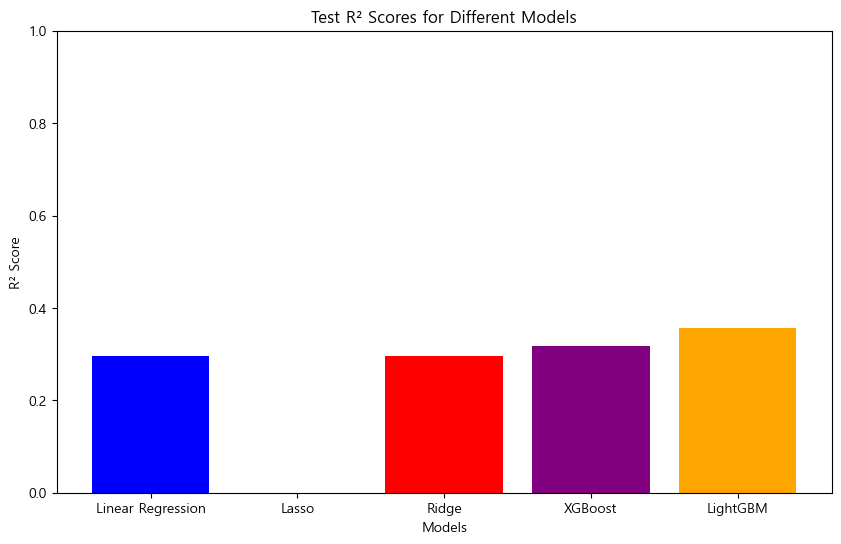

In [52]:
import matplotlib.pyplot as plt

# R² 점수 저장
models = ['Linear Regression', 'Lasso', 'Ridge', 'XGBoost', 'LightGBM']
r2_test_values = [r2_test_reg, r2_test_reg2, r2_test_reg3, r2_test_reg4, r2_test_reg5]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(models, r2_test_values, color=['blue', 'green', 'red', 'purple', 'orange'])

# 타이틀 및 라벨 추가
plt.title('Test R² Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # R² 점수의 범위는 0에서 1 사이
plt.show()


In [237]:
test

,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,4.920811,4.712888,4.727300,5.006142,4.712878,3.817650
1,4.920811,4.712888,4.727300,4.653990,4.712878,3.817650
2,4.920811,4.712888,4.727300,5.006142,4.712878,4.944597
3,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
4,4.920811,4.712888,4.618441,5.006142,4.712878,4.944597
...,...,...,...,...,...,...
10958,4.920811,4.712888,4.623681,6.578125,4.712878,4.944597
10959,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
10960,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
10961,4.920811,4.712888,4.727300,4.863035,4.712878,4.944597


In [238]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


#train data와 test data 열 값 사용이 같아야 함으로

In [239]:
# 훈련 데이터와 테스트 데이터의 열 비교
print("훈련 데이터 열:", X_train.columns)
print("테스트 데이터 열:", test.columns)

# 누락된 열 확인
missing_columns =  set(test.columns) - set(X_train.columns)
print("누락된 열:", missing_columns)


훈련 데이터 열: Index(['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',
       '가해운전자 차종', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')
테스트 데이터 열: Index(['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')
누락된 열: set()


In [240]:
test

,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,4.920811,4.712888,4.727300,5.006142,4.712878,3.817650
1,4.920811,4.712888,4.727300,4.653990,4.712878,3.817650
2,4.920811,4.712888,4.727300,5.006142,4.712878,4.944597
3,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
4,4.920811,4.712888,4.618441,5.006142,4.712878,4.944597
...,...,...,...,...,...,...
10958,4.920811,4.712888,4.623681,6.578125,4.712878,4.944597
10959,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
10960,4.920811,4.712888,4.727300,4.653990,4.712878,4.944597
10961,4.920811,4.712888,4.727300,4.863035,4.712878,4.944597


#test 진행 code / test_columns 

In [242]:
# test에 있는 columns 값들을 test_columns값에 넣음
test_columns = test.columns

# 훈련 데이터에서 테스트 데이터에 있는 열만 선택하여 재구성
X_train_aligned = X_train[test_columns] # train data 열들을 test 열들 있는 것만으로 수정

# 이제 훈련 데이터와 테스트 데이터의 열이 일치.


#LGB TEST 진행

In [243]:
lgb_model = LGBMRegressor()
lgb_model.fit(X_train_aligned, y_train)
lgb_predictions = lgb_model.predict(test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 22539, number of used features: 6
[LightGBM] [Info] Start training from score 4.798261


In [244]:
lgb_predictions

array([4.12012001, 3.88809528, 5.37531375, ..., 5.07449184, 5.3174123 ,
       5.22158712])

In [245]:
len(lgb_predictions) #개수 맞게 나왔는지 확인

10963

In [246]:
sample_EDA_lgb = pd.read_csv('./sample_submission.csv')

In [247]:
sample_EDA_lgb

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0
...,...,...
10958,ACCIDENT_50567,0
10959,ACCIDENT_50568,0
10960,ACCIDENT_50569,0
10961,ACCIDENT_50570,0


In [248]:
sample_EDA_lgb['ECLO'] = lgb_predictions

# 결과 확인
sample_EDA_lgb

,ID,ECLO
0,ACCIDENT_39609,4.120120
1,ACCIDENT_39610,3.888095
2,ACCIDENT_39611,5.375314
3,ACCIDENT_39612,5.074492
4,ACCIDENT_39613,5.214830
...,...,...
10958,ACCIDENT_50567,6.608941
10959,ACCIDENT_50568,5.074492
10960,ACCIDENT_50569,5.074492
10961,ACCIDENT_50570,5.317412


In [249]:
# 결과 파일로 저장
sample_EDA_lgb.to_csv('./submission_EDA_LGB.csv', index=False)




#딥러닝 TEST

#early stopping

In [250]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
# 데이터 전처리
# 'X_train_aligned'와 'X_test_encoded'를 정규화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_aligned)
X_test_scaled = scaler.transform(test)

# 딥러닝 모델 구성
dl_model = Sequential()
dl_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1, activation='linear'))

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# 모델 훈련에 Early Stopping 적용
# 검증 데이터(validation_data)도 필요.
# Compiling the model
dl_model.compile(optimizer='adam', loss='mean_squared_error')  # Use 'mean_squared_error' for regression

# Now you can fit the model with the compiled configuration
dl_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1, callbacks=[early_stopping], validation_split=0.2)
# 테스트 데이터에 대한 예측
dl_predictions = dl_model.predict(X_test_scaled)

Epoch 1/100


1804/1804 [==============================] - 3s 1ms/step - loss: 10.8076 - val_loss: 10.2717
Epoch 2/100
1804/1804 [==============================] - 2s 1ms/step - loss: 10.2422 - val_loss: 10.1265
Epoch 3/100
1804/1804 [==============================] - 3s 1ms/step - loss: 10.2054 - val_loss: 10.2662
Epoch 4/100
1804/1804 [==============================] - 2s 1ms/step - loss: 10.1816 - val_loss: 10.1503
Epoch 5/100
1804/1804 [==============================] - 2s 1ms/step - loss: 10.1710 - val_loss: 10.2060
Epoch 6/100
1804/1804 [==============================] - 2s 1ms/step - loss: 10.1658 - val_loss: 10.1336
Epoch 7/100
1804/1804 [==============================] - 2s 1ms/step - loss: 10.1509 - val_loss: 10.1108
Epoch 8/100
1804/1804 [==============================] - 2s 1ms/step - loss: 10.1494 - val_loss: 10.1429
Epoch 9/100
1804/1804 [==============================] - 3s 1ms/step - loss: 10.1467 - val_loss: 10.1701
Epoch 10/100
1804/1804 [==============================] - 2s 1ms/st

In [260]:
dl_predictions_1d = np.squeeze(dl_predictions) #np.sequeeze로 바꿔주고 넣어야함.

In [261]:
sample_EDA_dl = pd.read_csv('./sample_submission.csv')

In [262]:
sample_EDA_dl.shape

(10963, 2)

In [263]:
sample_EDA_dl['ECLO'] = dl_predictions_1d

# 결과 확인
sample_EDA_dl

,ID,ECLO
0,ACCIDENT_39609,4.303933
1,ACCIDENT_39610,3.895140
2,ACCIDENT_39611,5.251385
3,ACCIDENT_39612,4.994112
4,ACCIDENT_39613,5.322939
...,...,...
10958,ACCIDENT_50567,7.627893
10959,ACCIDENT_50568,4.994112
10960,ACCIDENT_50569,4.994112
10961,ACCIDENT_50570,5.141182


In [264]:
# 결과 파일로 저장
sample_EDA_dl.to_csv('./submission_EDA_dl.csv', index=False)

#LightGBM 점수 0.4480이 나옴<br>
#Deep learning(early stoping 적용) 점수: 0.448<br>
#Deep learning은 값 오류가 나와서 제출이 안 됌 <br>
다음과 같은 문구 발생<br>
"""
Data Error, 기타 제출값 Error가 발생하였습니다.
"""

보안사항<br>
-LGB, XGBOOST 과적합 해결<br>
-비정형 데이터 값 -ECLO값 넣지 않기 <br>

참고:
text값들을 굳이 ECLO 평균값으로 넣는것 보다, 데이터 간략하게 만든 후 ont-hot encoding으로 진행하는 것이 정확도가 더 잘 나옴

